In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
le = preprocessing.LabelEncoder()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [86]:
ds = pd.read_csv('churn2.csv')


In [88]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [90]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [91]:
ds.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [92]:
ds.duplicated().sum()

0

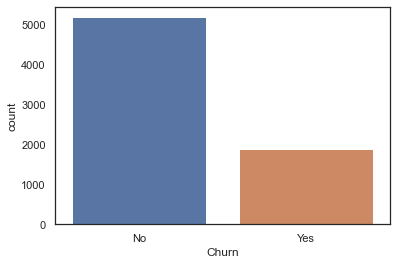

In [93]:
sns.set(style="white", palette="deep", color_codes=True)
sns.despine(left=True)
sns.countplot(ds["Churn"]);

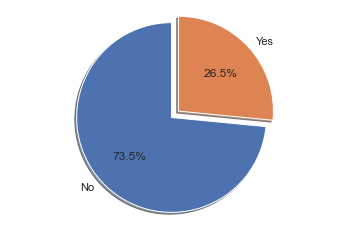

In [95]:
plt.pie(ds["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=ds["Churn"].unique())
plt.axis('equal') ;

In [96]:
ds.query("TotalCharges == ' '").TotalCharges.count()

11

In [98]:

ds["TotalCharges"] = ds["TotalCharges"].replace(" ",np.nan)
ds.dropna(inplace = True);

In [99]:
ds["TotalCharges"] = ds["TotalCharges"].astype("float")

In [100]:

ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [101]:
ds[ds["TotalCharges"]<0]["TotalCharges"].count()

0

In [103]:
temp_columns = [col for col in ds.columns if col not in ("customerID","gender","MonthlyCharges","TotalCharges","Churn")]

In [104]:

temp_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [106]:
for col in temp_columns:
    print("{} : {}".format(col,ds[col].unique()))

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [107]:
for col in temp_columns:
    if col in ("OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"):
        ds[col] = ds[col].replace({'No internet service':'No'})

In [109]:
temp_tenure = np.array(ds["tenure"].tolist())
print("min: {}".format(temp_tenure.min()))
print("max: {}".format(temp_tenure.max()))

min: 1
max: 72


In [112]:
def tenure_to_group(data):
    if ds["tenure"] <=12:
        return "0_1_year"
    elif (ds["tenure"] > 12) & (ds["tenure"] <= 24 ):
        return "1_2_year"
    elif (ds["tenure"] > 24) & (ds["tenure"] <= 36) :
        return "2_3_year"
    elif (ds["tenure"] > 36) & (ds["tenure"] <= 48) :
        return "3_4_year"
    elif ds["tenure"] > 48 & (ds["tenure"] <= 60):
        return "4_5_year"
    elif ds["tenure"] > 60 & (ds["tenure"] <= 72):
        return "5_6_year"


In [121]:
ds["tenure"] = ds.apply(lambda ds:tenure_to_group(ds),axis = 1)
sns.countplot(ds["tenure"]);

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

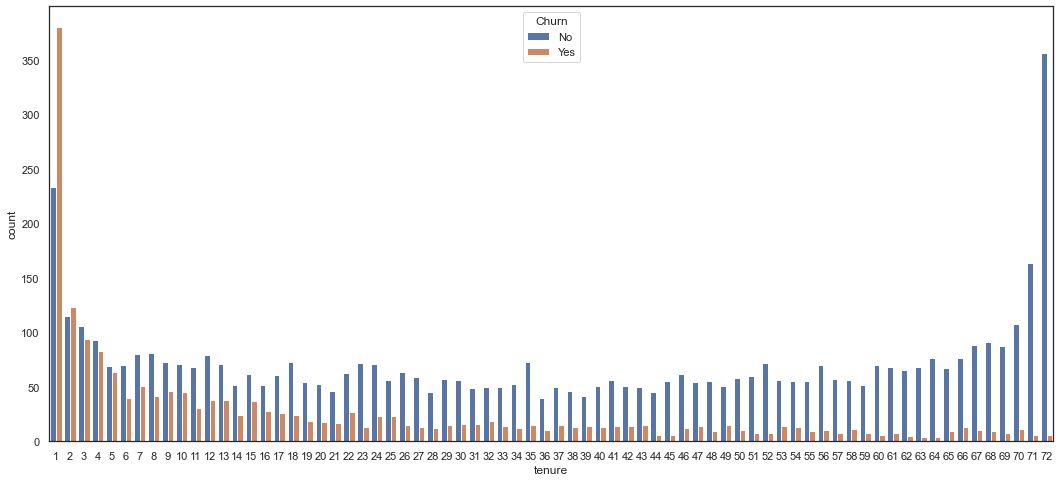

In [115]:
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(ds["tenure"],hue = ds["Churn"]);

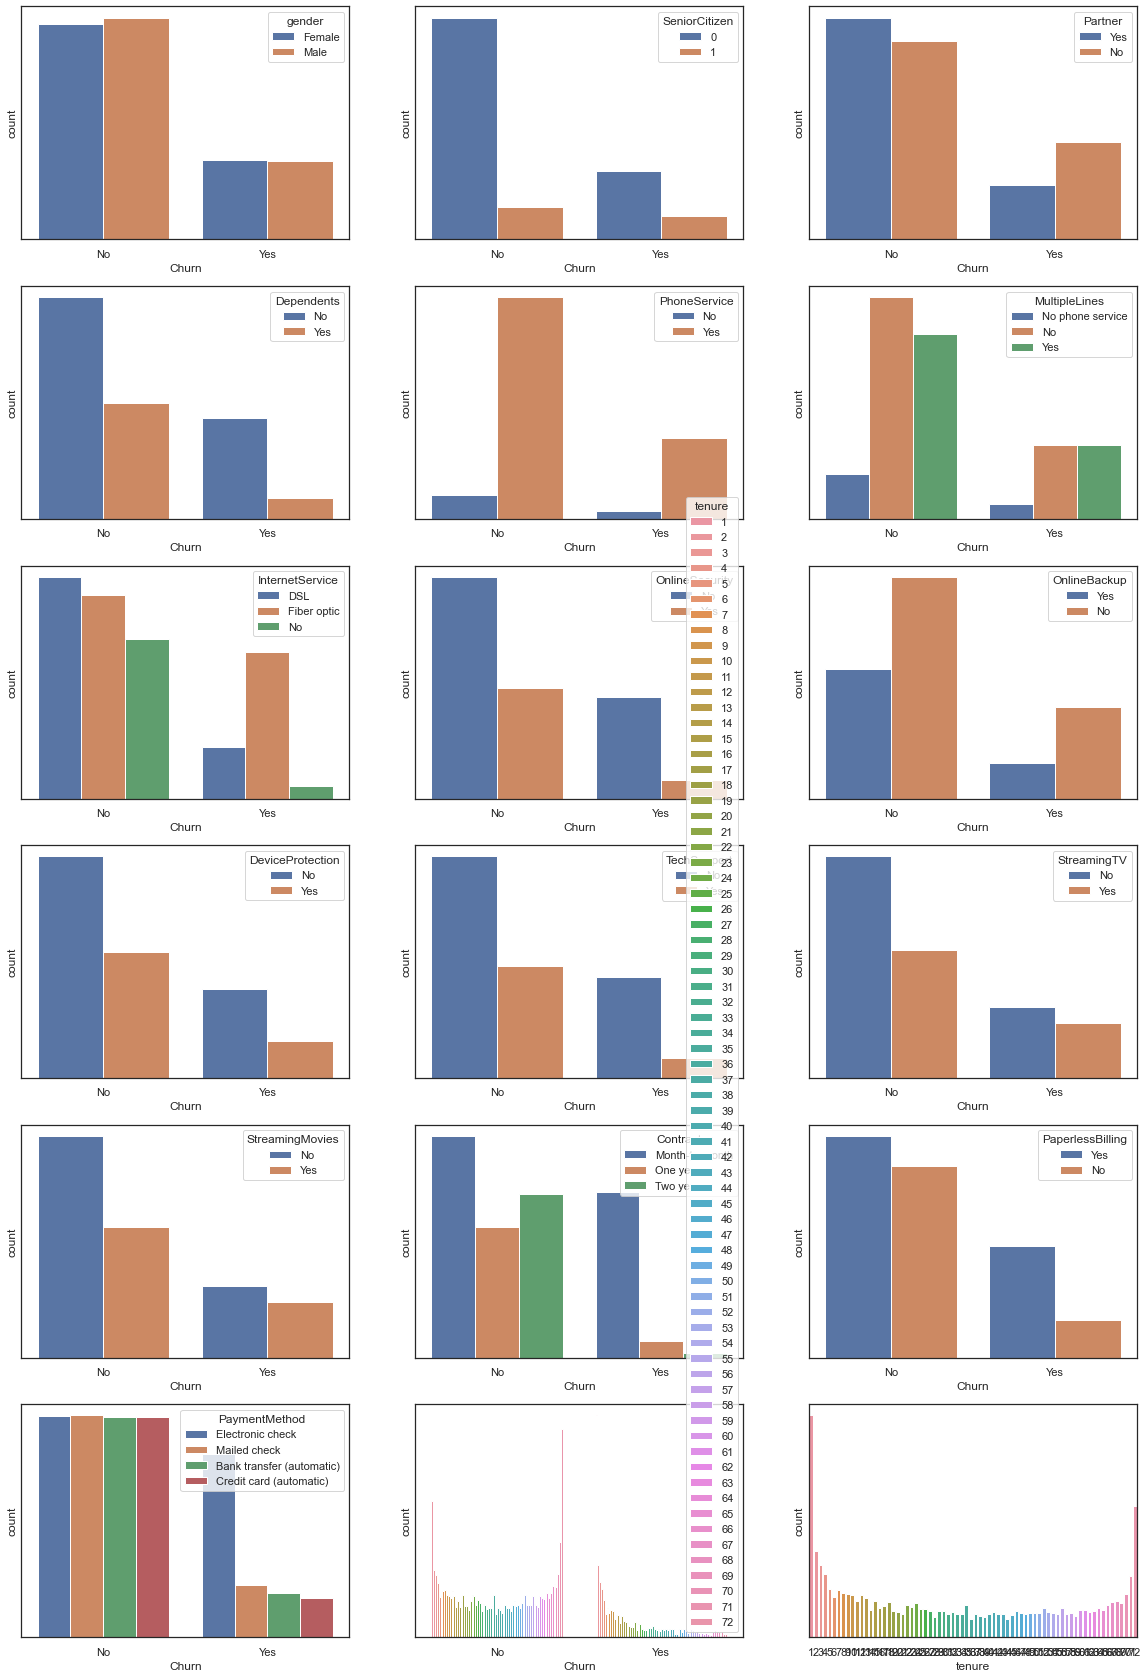

In [120]:
f, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))

sns.countplot(ds["Churn"],hue = ds["gender"],ax = axes[0,0])
sns.countplot(ds["Churn"],hue = ds["SeniorCitizen"],ax = axes[0,1])
sns.countplot(ds["Churn"],hue = ds["Partner"],ax = axes[0,2])
sns.countplot(ds["Churn"],hue = ds["Dependents"],ax = axes[1,0])
sns.countplot(ds["Churn"],hue = ds["PhoneService"],ax = axes[1,1])
sns.countplot(ds["Churn"],hue = ds["MultipleLines"],ax = axes[1,2])
sns.countplot(ds["Churn"],hue = ds["InternetService"],ax = axes[2,0])
sns.countplot(ds["Churn"],hue = ds["OnlineSecurity"],ax = axes[2,1])
sns.countplot(ds["Churn"],hue = ds["OnlineBackup"],ax = axes[2,2])
sns.countplot(ds["Churn"],hue = ds["DeviceProtection"],ax = axes[3,0])
sns.countplot(ds["Churn"],hue = ds["TechSupport"],ax = axes[3,1])
sns.countplot(ds["Churn"],hue = ds["StreamingTV"],ax = axes[3,2])
sns.countplot(ds["Churn"],hue = ds["StreamingMovies"],ax = axes[4,0])
sns.countplot(ds["Churn"],hue = ds["Contract"],ax = axes[4,1])
sns.countplot(ds["Churn"],hue = ds["PaperlessBilling"],ax = axes[4,2])
sns.countplot(ds["Churn"],hue = ds["PaymentMethod"],ax = axes[5,0])
sns.countplot(ds["Churn"],hue = ds["tenure"],ax = axes[5,1])
sns.countplot(ds["tenure"],ax = axes[5,2]);

plt.setp(axes, yticks=[])
plt.tight_layout()

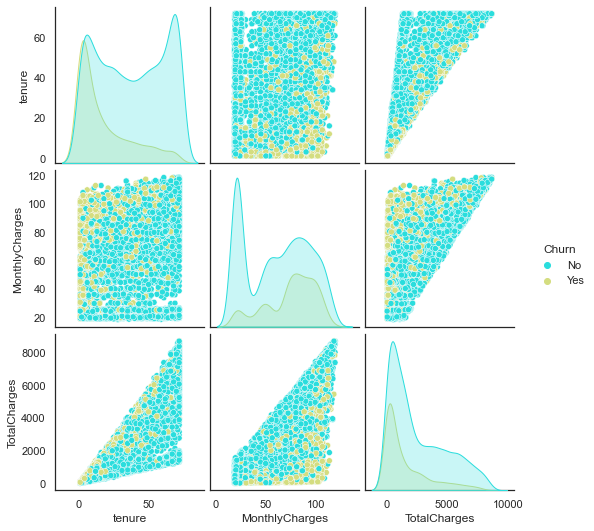

In [126]:

temp_cols = ds.drop("SeniorCitizen",axis = 1)
sns.pairplot(temp_cols,hue='Churn',palette='rainbow')

In [129]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [131]:
cat_cols = [x for x in ds.columns if ds[x].nunique()<6 and x!="Churn"]
num_cols = [x for x in ds.columns if ds[x].nunique()>6 and x!="customerID"]
id_customer = ds["customerID"]
label = ds["Churn"]
label = label.apply(lambda x: 1 if x == "Yes" else 0)

In [137]:

from sklearn.preprocessing import MinMaxScaler

features_log_transformed = pd.DataFrame(data = ds[num_cols])
features_log_transformed[num_cols] = ds[num_cols].apply(lambda x: np.log(x + 1))

scaler = MinMaxScaler()
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[num_cols] = scaler.fit_transform(features_log_transformed[num_cols])

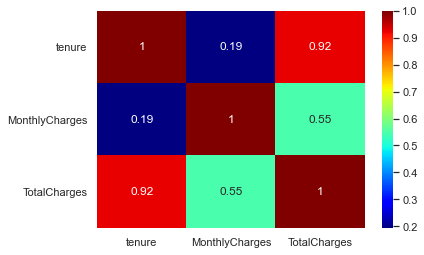

In [138]:
sns.heatmap(features_log_minmax_transform.corr(),annot=True,cmap='jet');

In [139]:
features_log_minmax_transform.drop("tenure",inplace = True, axis = 1)

In [141]:
ds.drop(["MonthlyCharges","TotalCharges","tenure"],axis = 1, inplace = True)
data = pd.concat([ds, features_log_minmax_transform], axis=1)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [143]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [144]:
data.duplicated().sum()

0

In [145]:
data.drop("Churn",inplace = True, axis = 1)
data.drop("customerID",inplace = True, axis = 1)

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  MonthlyCharges    7032 non-null   float64


In [147]:
data = pd.get_dummies(data = data,columns = cat_cols)

In [148]:
data.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.258016,0.072892,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0.602917,0.749358,0,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0.572840,0.280590,0,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.443484,0.745063,0,1,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0.719396,0.335724,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [149]:
data_original = pd.concat([data, label,id_customer], axis=1)

In [150]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           7032 non-null   float64
 1   TotalCharges                             7032 non-null   float64
 2   gender_Female                            7032 non-null   uint8  
 3   gender_Male                              7032 non-null   uint8  
 4   SeniorCitizen_0                          7032 non-null   uint8  
 5   SeniorCitizen_1                          7032 non-null   uint8  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  PhoneService_No                          7032 no

In [151]:
data_original.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,customerID
0,0.258016,0.072892,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,7590-VHVEG
1,0.602917,0.749358,0,1,1,0,1,0,1,0,...,1,0,1,0,0,0,0,1,0,5575-GNVDE
2,0.572840,0.280590,0,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,1,1,3668-QPYBK
3,0.443484,0.745063,0,1,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,7795-CFOCW
4,0.719396,0.335724,1,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,9237-HQITU


# algorithams

In [153]:

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4922 samples.
Testing set has 2110 samples.


In [154]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

In [157]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):
    
    clf.fit(xTrain, yTrain)
    predictions = clf.predict(xTest)
    conf_mtx = confusion_matrix(yTest,predictions)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix'); 
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);

    print("\n Classification report : \n {}".format(classification_report(yTest,predictions)))
    
    roc_auc = roc_auc_score(yTest,predictions) 
    print ("Area under ROC curve : ",roc_auc,"\n")

    fpr, tpr,_ = roc_curve(yTest, predictions)
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1549
           1       0.50      0.53      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.67      0.66      2110
weighted avg       0.74      0.73      0.73      2110

Area under ROC curve :  0.6683605891443966 



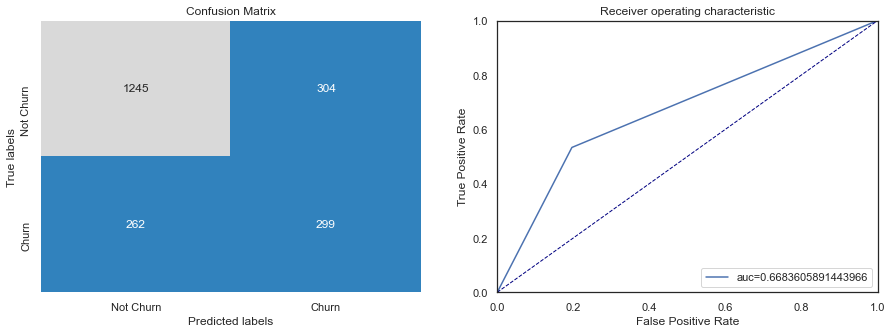

In [158]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train, X_test, y_train, y_test)



 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Area under ROC curve :  0.7108628532697192 



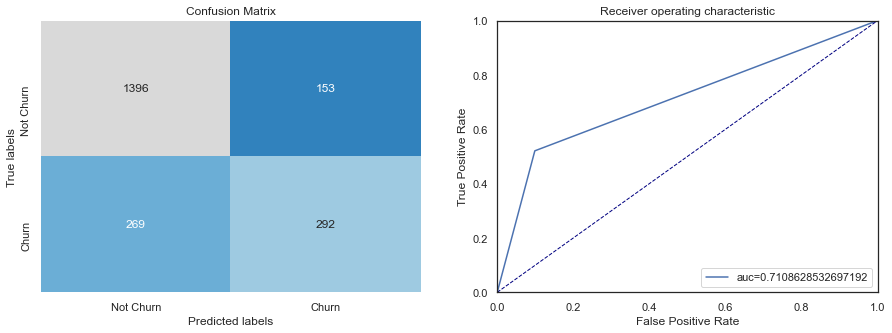

In [159]:

logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.50      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110

Area under ROC curve :  0.6928977236765943 



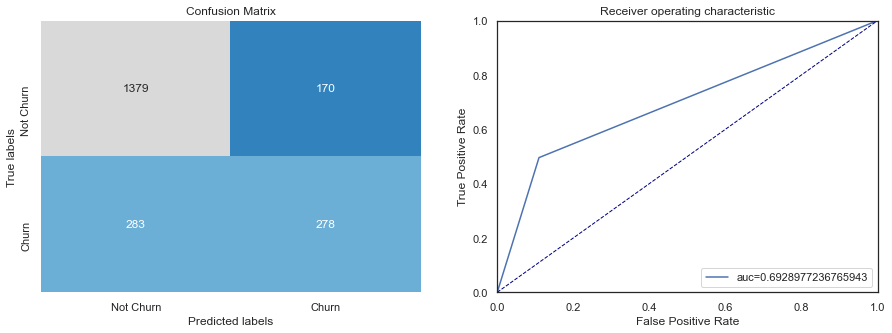

In [160]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.61      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110

Area under ROC curve :  0.6828481143029429 



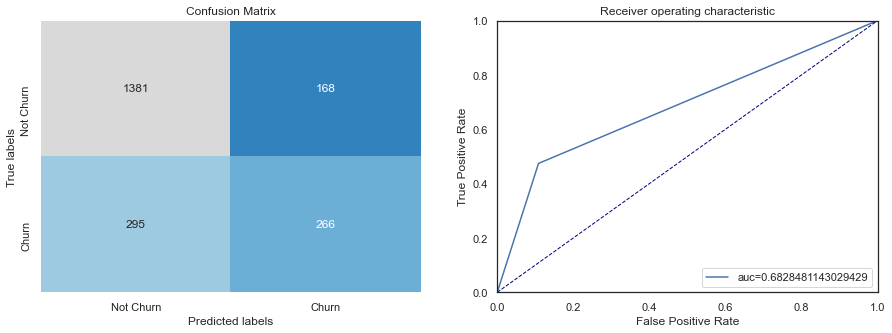

In [161]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

# Thank you